# Import 

In [763]:
import matplotlib.pyplot as plt
import pandas as pd
from moex.collecter import getPriceArray
from base.transform import RollingWindow
from collections import defaultdict
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

from sklearn.metrics import  f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score




%matplotlib inline

# Get data

https://iss.moex.com/iss/securities/ACKO.xml
https://iss.moex.com/iss/history/engines/stock/markets/shares/securities/ACKO.xml


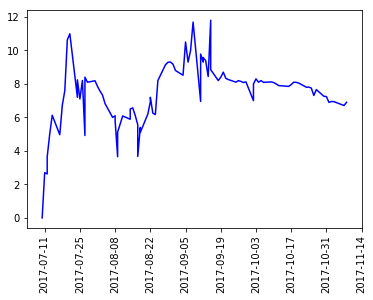

https://iss.moex.com/iss/securities/acru.xml
https://iss.moex.com/iss/history/engines/stock/markets/moexboard/securities/acru.xml
https://iss.moex.com/iss/securities/AFH8.xml
https://iss.moex.com/iss/history/engines/futures/markets/forts/securities/AFH8.xml
https://iss.moex.com/iss/securities/AFKC.xml
https://iss.moex.com/iss/history/engines/stock/markets/shares/securities/AFKC.xml
https://iss.moex.com/iss/securities/AFKS.xml
https://iss.moex.com/iss/history/engines/stock/markets/shares/securities/AFKS.xml
https://iss.moex.com/iss/securities/AFLT.xml
https://iss.moex.com/iss/history/engines/stock/markets/shares/securities/AFLT.xml
https://iss.moex.com/iss/securities/afmc.xml
https://iss.moex.com/iss/history/engines/stock/markets/otc/securities/afmc.xml
https://iss.moex.com/iss/securities/AFZ7.xml
https://iss.moex.com/iss/history/engines/futures/markets/forts/securities/AFZ7.xml
https://iss.moex.com/iss/securities/AGRO.xml
https://iss.moex.com/iss/history/engines/stock/markets/shares/se

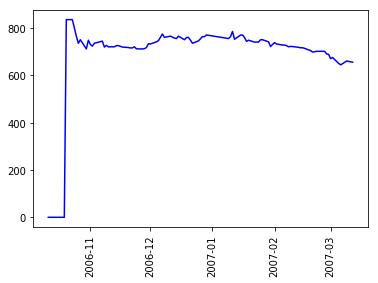

https://iss.moex.com/iss/securities/ALBK.xml
https://iss.moex.com/iss/history/engines/stock/markets/shares/securities/ALBK.xml
https://iss.moex.com/iss/securities/ALH8.xml
https://iss.moex.com/iss/history/engines/futures/markets/forts/securities/ALH8.xml
https://iss.moex.com/iss/securities/ALNU.xml
https://iss.moex.com/iss/history/engines/stock/markets/shares/securities/ALNU.xml
https://iss.moex.com/iss/securities/ALRS.xml
https://iss.moex.com/iss/history/engines/stock/markets/shares/securities/ALRS.xml
https://iss.moex.com/iss/securities/ALZ7.xml
https://iss.moex.com/iss/history/engines/futures/markets/forts/securities/ALZ7.xml
https://iss.moex.com/iss/securities/AMEZ.xml
https://iss.moex.com/iss/history/engines/stock/markets/shares/securities/AMEZ.xml
https://iss.moex.com/iss/securities/apsz.xml
https://iss.moex.com/iss/history/engines/stock/markets/otc/securities/apsz.xml
https://iss.moex.com/iss/securities/APTK.xml
https://iss.moex.com/iss/history/engines/stock/markets/shares/secur

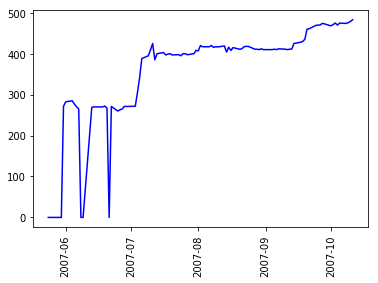

https://iss.moex.com/iss/securities/arpo.xml
https://iss.moex.com/iss/history/engines/stock/markets/moexboard/securities/arpo.xml
https://iss.moex.com/iss/securities/arpop.xml
https://iss.moex.com/iss/history/engines/stock/markets/moexboard/securities/arpop.xml
https://iss.moex.com/iss/securities/ARSA.xml
https://iss.moex.com/iss/history/engines/stock/markets/shares/securities/ARSA.xml
https://iss.moex.com/iss/securities/ASSB.xml
https://iss.moex.com/iss/history/engines/stock/markets/shares/securities/ASSB.xml
https://iss.moex.com/iss/securities/ATAD-ME.xml
https://iss.moex.com/iss/history/engines/stock/markets/repo/securities/ATAD-ME.xml
https://iss.moex.com/iss/securities/AUH8.xml
https://iss.moex.com/iss/history/engines/futures/markets/forts/securities/AUH8.xml
https://iss.moex.com/iss/securities/AUZ7.xml
https://iss.moex.com/iss/history/engines/futures/markets/forts/securities/AUZ7.xml
https://iss.moex.com/iss/securities/AVAN.xml
https://iss.moex.com/iss/history/engines/stock/marke

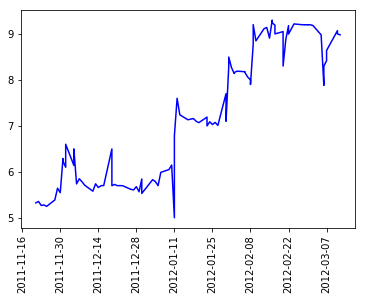

https://iss.moex.com/iss/securities/AVGR-ME.xml
https://iss.moex.com/iss/history/engines/stock/markets/repo/securities/AVGR-ME.xml
https://iss.moex.com/iss/securities/avsk.xml
https://iss.moex.com/iss/history/engines/stock/markets/otc/securities/avsk.xml
https://iss.moex.com/iss/securities/BANE.xml
https://iss.moex.com/iss/history/engines/stock/markets/shares/securities/BANE.xml
https://iss.moex.com/iss/securities/BANEP.xml
https://iss.moex.com/iss/history/engines/stock/markets/shares/securities/BANEP.xml
https://iss.moex.com/iss/securities/BELU.xml
https://iss.moex.com/iss/history/engines/stock/markets/shares/securities/BELU.xml
https://iss.moex.com/iss/securities/benr.xml
https://iss.moex.com/iss/history/engines/stock/markets/shares/securities/benr.xml
https://iss.moex.com/iss/securities/bges.xml
https://iss.moex.com/iss/history/engines/stock/markets/otc/securities/bges.xml
https://iss.moex.com/iss/securities/bgesp.xml
https://iss.moex.com/iss/history/engines/stock/markets/moexboard/

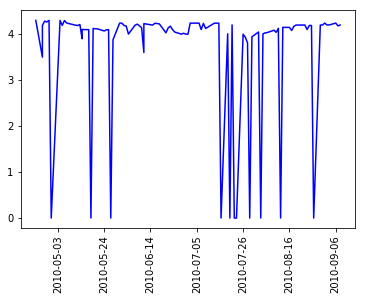

https://iss.moex.com/iss/securities/BISVP.xml
https://iss.moex.com/iss/history/engines/stock/markets/shares/securities/BISVP.xml
https://iss.moex.com/iss/securities/BLNG.xml
https://iss.moex.com/iss/history/engines/stock/markets/shares/securities/BLNG.xml
https://iss.moex.com/iss/securities/bmkk.xml
https://iss.moex.com/iss/history/engines/stock/markets/otc/securities/bmkk.xml
https://iss.moex.com/iss/securities/bmsm.xml
https://iss.moex.com/iss/history/engines/stock/markets/otc/securities/bmsm.xml
https://iss.moex.com/iss/securities/bogz.xml
https://iss.moex.com/iss/history/engines/stock/markets/otc/securities/bogz.xml
https://iss.moex.com/iss/securities/borg.xml
https://iss.moex.com/iss/history/engines/stock/markets/otc/securities/borg.xml
https://iss.moex.com/iss/securities/brad.xml
https://iss.moex.com/iss/history/engines/stock/markets/otc/securities/brad.xml
https://iss.moex.com/iss/securities/BRF8.xml
https://iss.moex.com/iss/history/engines/futures/markets/forts/securities/BRF8.

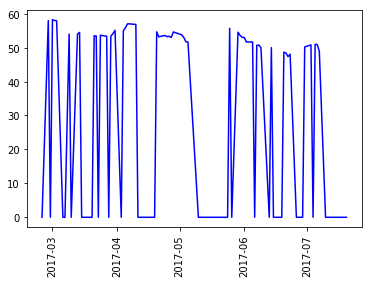

https://iss.moex.com/iss/securities/BRJ8.xml
https://iss.moex.com/iss/history/engines/futures/markets/forts/securities/BRJ8.xml
https://iss.moex.com/iss/securities/BRK8.xml
https://iss.moex.com/iss/history/engines/futures/markets/forts/securities/BRK8.xml
https://iss.moex.com/iss/securities/BRM8.xml
https://iss.moex.com/iss/history/engines/futures/markets/forts/securities/BRM8.xml
https://iss.moex.com/iss/securities/BRN8.xml
https://iss.moex.com/iss/history/engines/futures/markets/forts/securities/BRN8.xml
https://iss.moex.com/iss/securities/brog.xml
https://iss.moex.com/iss/history/engines/stock/markets/otc/securities/brog.xml
https://iss.moex.com/iss/securities/BRQ8.xml
https://iss.moex.com/iss/history/engines/futures/markets/forts/securities/BRQ8.xml
https://iss.moex.com/iss/securities/brsz.xml
https://iss.moex.com/iss/history/engines/stock/markets/otc/securities/brsz.xml
https://iss.moex.com/iss/securities/brszp.xml
https://iss.moex.com/iss/history/engines/stock/markets/otc/securit

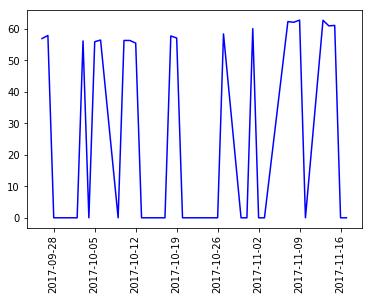

https://iss.moex.com/iss/securities/BRX8.xml
https://iss.moex.com/iss/history/engines/futures/markets/forts/securities/BRX8.xml
https://iss.moex.com/iss/securities/BRZ7.xml
https://iss.moex.com/iss/history/engines/futures/markets/forts/securities/BRZ7.xml
https://iss.moex.com/iss/securities/BRZL.xml
https://iss.moex.com/iss/history/engines/stock/markets/shares/securities/BRZL.xml
https://iss.moex.com/iss/securities/brzlp.xml
https://iss.moex.com/iss/history/engines/stock/markets/otc/securities/brzlp.xml
https://iss.moex.com/iss/securities/BSPB.xml
https://iss.moex.com/iss/history/engines/stock/markets/shares/securities/BSPB.xml
https://iss.moex.com/iss/securities/btst.xml
https://iss.moex.com/iss/history/engines/stock/markets/otc/securities/btst.xml
https://iss.moex.com/iss/securities/btstp.xml
https://iss.moex.com/iss/history/engines/stock/markets/otc/securities/btstp.xml
https://iss.moex.com/iss/securities/BWZ7.xml
https://iss.moex.com/iss/history/engines/futures/markets/forts/securi

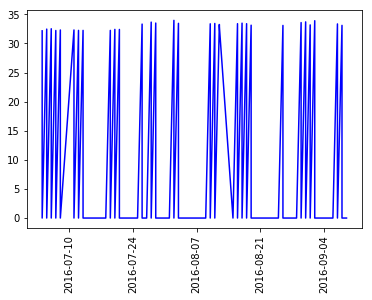

https://iss.moex.com/iss/securities/BYNRUB_TOM.xml
https://iss.moex.com/iss/history/engines/currency/markets/selt/securities/BYNRUB_TOM.xml
https://iss.moex.com/iss/securities/CAH8.xml
https://iss.moex.com/iss/history/engines/futures/markets/forts/securities/CAH8.xml
https://iss.moex.com/iss/securities/CAZ7.xml
https://iss.moex.com/iss/history/engines/futures/markets/forts/securities/CAZ7.xml
https://iss.moex.com/iss/securities/CBOM.xml
https://iss.moex.com/iss/history/engines/stock/markets/shares/securities/CBOM.xml
https://iss.moex.com/iss/securities/ccsg.xml
https://iss.moex.com/iss/history/engines/stock/markets/moexboard/securities/ccsg.xml
https://iss.moex.com/iss/securities/cenh.xml
https://iss.moex.com/iss/history/engines/stock/markets/otc/securities/cenh.xml
https://iss.moex.com/iss/securities/CFH8.xml
https://iss.moex.com/iss/history/engines/futures/markets/forts/securities/CFH8.xml
https://iss.moex.com/iss/securities/CFZ7.xml
https://iss.moex.com/iss/history/engines/futures/m

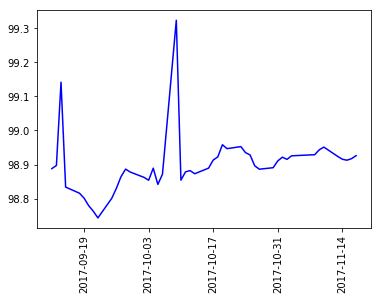

https://iss.moex.com/iss/securities/CH0317921671.xml
https://iss.moex.com/iss/history/engines/stock/markets/otc/securities/CH0317921671.xml
https://iss.moex.com/iss/securities/CH0346828400.xml
https://iss.moex.com/iss/history/engines/stock/markets/repo/securities/CH0346828400.xml
https://iss.moex.com/iss/securities/CH0379268748.xml
https://iss.moex.com/iss/history/engines/stock/markets/repo/securities/CH0379268748.xml
https://iss.moex.com/iss/securities/chaz.xml
https://iss.moex.com/iss/history/engines/stock/markets/otc/securities/chaz.xml
https://iss.moex.com/iss/securities/CHEG.xml
https://iss.moex.com/iss/history/engines/stock/markets/otc/securities/CHEG.xml
https://iss.moex.com/iss/securities/CHEP.xml
https://iss.moex.com/iss/history/engines/stock/markets/shares/securities/CHEP.xml
https://iss.moex.com/iss/securities/CHFRUBTODTOM.xml
https://iss.moex.com/iss/history/engines/currency/markets/selt/securities/CHFRUBTODTOM.xml
https://iss.moex.com/iss/securities/CHFRUB_TOD.xml
https://

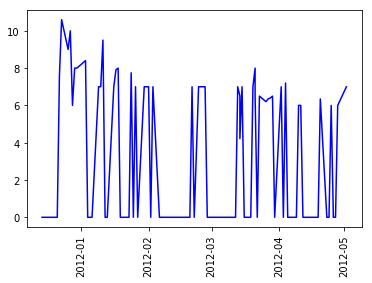

https://iss.moex.com/iss/securities/CHH8.xml
https://iss.moex.com/iss/history/engines/futures/markets/forts/securities/CHH8.xml
https://iss.moex.com/iss/securities/CHKZ.xml
https://iss.moex.com/iss/history/engines/stock/markets/shares/securities/CHKZ.xml
https://iss.moex.com/iss/securities/CHMF.xml
https://iss.moex.com/iss/history/engines/stock/markets/shares/securities/CHMF.xml
https://iss.moex.com/iss/securities/CHMK.xml
https://iss.moex.com/iss/history/engines/stock/markets/shares/securities/CHMK.xml
https://iss.moex.com/iss/securities/CHZ7.xml
https://iss.moex.com/iss/history/engines/futures/markets/forts/securities/CHZ7.xml
https://iss.moex.com/iss/securities/CHZN.xml
https://iss.moex.com/iss/history/engines/stock/markets/shares/securities/CHZN.xml
https://iss.moex.com/iss/securities/cinb.xml
https://iss.moex.com/iss/history/engines/stock/markets/moexboard/securities/cinb.xml
https://iss.moex.com/iss/securities/city.xml
https://iss.moex.com/iss/history/engines/stock/markets/otc/se

In [2]:
a = pd.read_csv('list.txt')
list_sec = [a[0].split()[1] for a in a.values.tolist()]
moex_list = [[]]
for i,sequrity in enumerate(list_sec):
    try:
        d = getPriceArray(sequrity)
        moex_list.append([d])
    except:
        continue
    if i%10 == 0:
        plt.plot(d['DATE'], d['CLOSE'], label='OPEN', color='b')
        plt.xticks(rotation=90)
        plt.show() 

In [11]:
import pickle

with open('moex_list.txt', 'wb') as fp:
    pickle.dump(moex_list, fp)

In [482]:
import pickle

with open ('moex_list.txt', 'rb') as fp:
    moex_list = pickle.load(fp)

# Common functions 

In [175]:
def difference_window(data, d, start):
    #first, start is zero
    #d is a size of step
    return list(np.array([[y - x for x in data[start:-d-start]] for y in data[d+start:]]).diagonal())

In [203]:
def difference_window(data, d, start):
    y = np.array(data[d+start:len(data)-start])
    x = np.array(data[start:len(data)-d-start])
    return list(y-x)

In [204]:
def smoth(y0, alpha):
    def smoothy(y):
        smoothy.y = smoothy.alpha * y  + (1-smoothy.alpha) * smoothy.y
        return smoothy.y
    smoothy.alpha = alpha
    smoothy.y = y0
    return smoothy

In [884]:
#y in this equation is difference_window(data,14):
def rs(y):
    Average_Gain = np.sum([x for x in y if x>=0])
    Average_Loss = abs(np.sum([x for x in y if x<0]))
    RS = np.divide(Average_Gain, Average_Loss)
    return RS

def rsi(x):
    rsi_ = 100 - np.divide(100, 1 + rs(x)) 
    return rsi_

In [886]:
def train_data(data, window):
    columns = ['x_{}'.format(i) for i in range(0, (window*2) -1)]
    columns.append('rsi')
    columns.append('target')
    TRAIN_DATA = pd.DataFrame(columns=columns)
    for j,s in enumerate(range(0,len(data)-window-1)):
        target = np.sign(np.array(data[s+window+1]) - np.array(data[s+window]))
        if target==0:
            target+=1
        dif = [data[i+1] - data[i] for i in range(s, s+window-1)]
        temp = data[s:s+window] + dif +[rsi(dif)]+[target]
        df_temp = pd.DataFrame([temp], columns=columns, index =[j] )
        TRAIN_DATA = TRAIN_DATA.append(df_temp)
    return TRAIN_DATA

In [887]:
def transform_to(moex_list, k):
    try:
        moex_data = [[moex_list[1:][i][0]['OPEN']] for i in range(0, len(moex_list)-1)]
        moex_data_ = [float(str(moex_data[k][0]).split()[i]) for i in range(0, len(moex_data[0][0])) if i%2 !=0]
        return moex_data_
    except:
        pass

In [925]:
window = 14
columns = ['x_{}'.format(i) for i in range(0, (window*2) -1)]
columns.append('rsi')
columns.append('target')

TRAIN_DATA = pd.DataFrame(columns=columns)

for i in range(len(moex_list)-20):#20 for test data
    try:
        df2 = train_data(transform_to(moex_list, i), window)
        TRAIN_DATA = TRAIN_DATA.append(df2,ignore_index=True)
    except:
        continue


/Users/romandegtyarev/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/Users/romandegtyarev/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [927]:
TRAIN_DATA.dropna(inplace=True) 

In [928]:
TRAIN_DATA.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,rsi,target
0,0.000,2.700,2.625,2.900,3.650,4.300,7.5600,5.2650,7.0100,7.7000,...,3.2600,-2.2950,1.7450,0.6900,3.9945,-4.4945,3.489,-2.6880,64.758725,-1.0
1,2.700,2.625,2.900,3.650,4.300,7.560,5.2650,7.0100,7.7000,11.6945,...,-2.2950,1.7450,0.6900,3.9945,-4.4945,3.4890,-2.688,-0.8050,58.916743,1.0
2,2.625,2.900,3.650,4.300,7.560,5.265,7.0100,7.7000,11.6945,7.2000,...,1.7450,0.6900,3.9945,-4.4945,3.4890,-2.6880,-0.805,-2.2760,54.186123,1.0
3,2.900,3.650,4.300,7.560,5.265,7.010,7.7000,11.6945,7.2000,10.6890,...,0.6900,3.9945,-4.4945,3.4890,-2.6880,-0.8050,-2.276,3.3800,58.847528,-1.0
4,3.650,4.300,7.560,5.265,7.010,7.700,11.6945,7.2000,10.6890,8.0010,...,3.9945,-4.4945,3.4890,-2.6880,-0.8050,-2.2760,3.380,0.0995,57.951216,1.0


# Model

In [929]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

RANDOM_STATE = 123
model = RandomForestClassifier(max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE, criterion = 'entropy')

error_rate_oob = defaultdict()
error_rate_nnl = defaultdict()

X,y = TRAIN_DATA[TRAIN_DATA.columns[0:-1]].values, TRAIN_DATA.target.values


min_estimators = 15
max_estimators = 175
for i in range(min_estimators, max_estimators + 1):
    model.set_params(n_estimators=i)
    model.fit(X, y)
    y_pred = model.predict(X)

    # Record the OOB error for each `n_estimators=i` setting.
    oob_error = 1 - model.oob_score_
    nnl_error = log_loss(y, y_pred)
    error_rate_oob[i]= oob_error
    error_rate_nnl[i] = nnl_error

/Users/romandegtyarev/anaconda/envs/py3k/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/romandegtyarev/anaconda/envs/py3k/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/romandegtyarev/anaconda/envs/py3k/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/romandegtyarev/anaconda/envs/py3k/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/romandegtyarev/anaconda/envs/

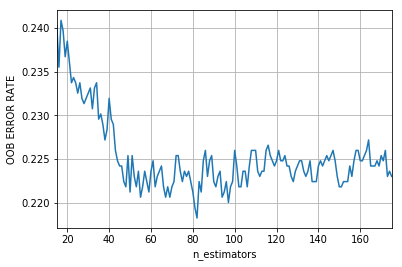

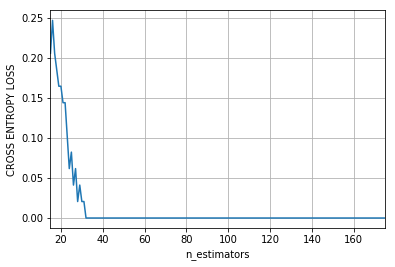

In [899]:
plt.plot(list(error_rate_oob.keys()), list(error_rate_oob.values()))
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB ERROR RATE")
plt.grid()
plt.show()

plt.plot(list(error_rate_nnl.keys()), list(error_rate_nnl.values()))
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("CROSS ENTROPY LOSS")
plt.grid()
plt.show()
#window = 7

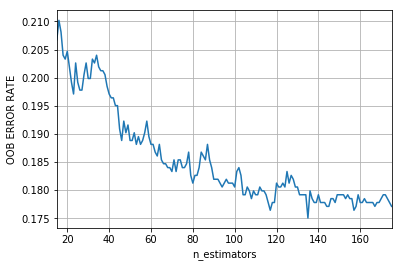

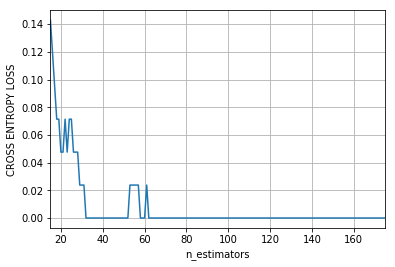

In [930]:
plt.plot(list(error_rate_oob.keys()), list(error_rate_oob.values()))
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB ERROR RATE")
plt.grid()
plt.show()

plt.plot(list(error_rate_nnl.keys()), list(error_rate_nnl.values()))
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("CROSS ENTROPY LOSS")
plt.grid()
plt.show()
#window = 14

In [900]:
#choose model with window = 7 and n_estimators = 80

In [931]:
model = RandomForestClassifier(max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE, n_estimators=160, criterion = 'gini', max_depth = 5)

model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=160, n_jobs=1,
            oob_score=True, random_state=123, verbose=0, warm_start=False)

In [932]:
columns = ['x_{}'.format(i) for i in range(0, 2*window-1)]
columns.append('rsi')
columns.append('target')
TEST_DATA = pd.DataFrame(columns=columns)
for i in range(len(moex_list)-20, len(moex_list)):
    try:
        df2 = train_data(transform_to(moex_list, i), window)
        TEST_DATA = TRAIN_DATA.append(df2,ignore_index=True)
    except:
        continue
TEST_DATA.dropna(inplace=True) 
X_test, y_test = TEST_DATA[TEST_DATA.columns[0:-1]].values, TEST_DATA.target.values

/Users/romandegtyarev/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/romandegtyarev/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


In [933]:
print(model.feature_importances_)

[ 0.0117834   0.00811797  0.01354993  0.00689168  0.03217564  0.00823483
  0.0155435   0.01093882  0.00957842  0.01045994  0.00806469  0.01296134
  0.02377347  0.07665228  0.0276213   0.0156397   0.01854047  0.01865945
  0.03133374  0.01845831  0.01710072  0.02272146  0.01758942  0.02795803
  0.05457234  0.04172085  0.39668154  0.04267674]


In [934]:
X.shape

(1451, 28)

In [935]:
X_test.shape

(1486, 28)

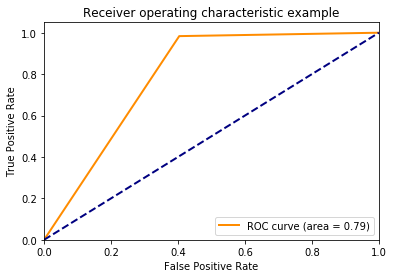

CROSS ENTROPY LOSS: 3.00, PRECISION: 0.92, RECALL: 0.98, F1_SCORE: 0.95


In [953]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print ('CROSS ENTROPY LOSS: {0:.2f}, PRECISION: {1:.2f}, RECALL: {2:.2f}, F1_SCORE: {3:.2f}'.format(log_loss(y_test, y_score), 
                                                                  precision_score(y_test, y_score), 
                                                                  recall_score(y_test, y_score), 
                                                                    f1_score(y_test, y_score)))